# Among Us Google Play Store Comments Word Cloud using Python

Hello Everyone! I kinda intrigued with analyzing the comments from our Among Us project (see “Our Projects Section” to sneak peek about our previous projects). As I haven't got the ability to do an advanced text analytics such as sentiment analysis, I started with a simple Word Cloud to gather a general overview of what people think about this game.

In case you missed it, in our previous project, we made some analysis from the Google Play Store User Ratings and Comments for Among Us Game. The data were scrapped from Google Play Store User Rating and Comments for Among Us Game with the range of September 22nd to October 20th.

Scrolling accross the internet world, you might have probably seen a picture with different sizes of words which represent the frequency of each word. In case you haven't know, it is called a WordCloud. I use the tutorial from "Generating WordClouds in Python" by Duong Vu (https://www.datacamp.com/community/tutorials/wordcloud-python) and adapt it to our project, but only took a part of it as that tutorial covers a more advanced topic of converting the WordCloud into an image of a bottle of wine or a flag. Our tutorial only covered the simple WordCloud part.

We started by installing the wordcloud as a required library:

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

Load the Excel File into the dataframe and look at the first 5 rows:

In [3]:
# Load in the dataframe
df = pd.read_excel("data/AmongUsRating.xlsx", index_col=0)
# Looking at first 5 rows of the dataset
df.head()

,Star,User,Comment,DateReview,Rate
0,Rated 4 stars out of five stars,Epic Sean22,Hey there! This game is really fun and all but...,2020-10-17,4
1,Rated 4 stars out of five stars,Wan Taquddin,"Everything about this game is amazing, the con...",2020-10-15,4
2,Rated 5 stars out of five stars,Eve,I love playing this game! It is so much fun wh...,2020-10-15,5
3,Rated 5 stars out of five stars,Gab .M,Its extremely fun and addictive! It got pretty...,2020-10-16,5
4,Rated 5 stars out of five stars,Kaizin,I love this game a lot! I have a lot of fun wi...,2020-10-16,5


Observe the size of the data by looking at its shape:

In [4]:
# Observe the shape
df.shape

(32080, 5)

In case you are wondering about what are the WordCloud library functions and paramaters, you can use this command:

In [5]:
?WordCloud

Okay, now we're ready to do the WordCloud process into our data. Simply assign the 'Comment' column in our DataFrame, generate it using WordCloud, and plot it (in this case we use Matplotlib). Let's have a look on the first row of the data.

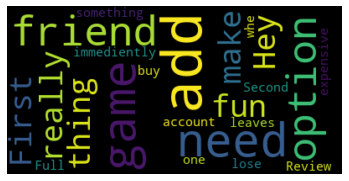

In [6]:
# Start with one review:
text = df.Comment[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

By default WordCloud will generate an image as seen above. From the ?WordCloud command, we can use some parameters to modify the image as we want. Let's modify the max_font_size to 50, max_words to 100, and background_color to white.

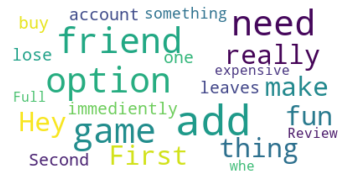

In [7]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Nice one! Although you can just right click on the image and save it as a file, you might also want to save it as a file using the WordCloud function in Python command:

In [8]:
# Save the image in the img folder:
# Notice that it might raise an error if the folder 'img' is not created already due to permission
wordcloud.to_file("img/first_review.png")

Now let's try to WordCloud all the comments. Let us observe how many words are there in our observation data.

In [9]:
text = " ".join(comment for comment in df.Comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5565043 words in the combination of all review.


We repeat the process using all words in the comments:

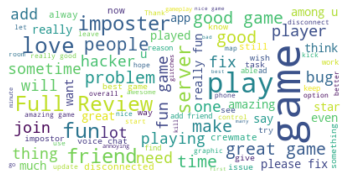

In [10]:
# Using the same logic as before using all words in the comments
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Isn't it great? Not really. You might notice that some words are irrelevant with words that we expect to best describe the game, such as "Full" and "Review" as our data from scrapping didn't get the full review and leaves the "Full Review" text in the comment, and words like "want", "will", "much", etc. Those words are called "Stop words" which is most common words that are not useful for our analysis. To get rid of that, we can use the STOPWORDS package from WordCloud, and add it with some custom-defined words as we desire (i.e. "add", "alway", "always", "among", "amongus", "even", "full", "game", "games", "lot", "make", "much", "one", "play", "player", "players", "playing", "please", "really", "review", "server", "servers", "sometime", "sometimes", "star", "still", "thing", "u", "will")

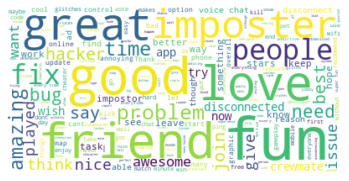

In [11]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["add", "alway", "always", "among", "amongus", "even", "full", "game", "games", "lot", "make", "much", "one", "play", "player", "players", "playing", "please", "really", "review", "server", "servers", "sometime", "sometimes", "star", "still", "thing", "u", "us", "will"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Finally! It should be enough for now. As we see, some of its big words are positives like "friend", "fun", "love", "great", and "good". There are some negatives too such as "hacker", "bug", and "disconnected". By any means, we now know what people think about this game based on the comments of this game in the Google Play Store.

## Conclusion

We created a Word Cloud of Among Us Google Play Store Comments using Python and WordCloud library from data that we scrapped with the data range of September 22nd to October 20th. Most sentiments show positives thought (e.g. "friend", "fun", "love", "great", and "good"), but there are also some negatives thought (e.g. "hacker", "bug", and "disconnected"). We showed the use of stopwords removal to get rid of irrelevant words. Word Cloud showed an easy way to represent people thoughts based on the collected texts. There are still more to explore regarding to the text analysis such as sentiment analysis, or anomaly detection in such way that despite giving 5 stars, the comments are negative, and vice versa.

## Remarks

Please find the source code used for this post [here](#). Feel free to discuss with us for anything :D

## Our Projects

1. [Among Us Google Play Store User Rating Visualization Using Tableau](https://www.linkedin.com/posts/rickynauvaldy_me-and-some-colleagues-who-graduated-from-activity-6726391392807088128-mYXB) ([source](https://public.tableau.com/profile/rahman.firmansyah#!/vizhome/Winthisdatapt_1/Dashboard1))
2. [Among Us Google Play Store Rating Exploratory Data Analysis using Python](https://github.com/rickynauvaldy/eda_among_us) ([source](https://rickynauvaldy.medium.com/among-us-eda-web-application-using-streamlit-3f1a0bd0b8d6))
3. [Among Us EDA Web Application using Streamlit](https://rickynauvaldy.medium.com/among-us-google-play-store-rating-exploratory-data-analysis-e9ee8b419344) ([source](https://github.com/imbhaskara/project_streamlit))
4. [Among Us Google Play Store Comments Word Cloud using Python](#) ([source](#))

## Our Team

![ourteam.jpg](ourteam.jpg)

<br><br>
Above, from left to right: <a href="https://www.linkedin.com/in/imam-bhaskara">Imam Bhaskara</a>, <a href="https://www.linkedin.com/in/rickynauvaldy/">Ricky Nauvaldy Ruliputra</a>, <a href="https://www.linkedin.com/in/rahman-firmansyah-79283512b">Rahman Firmansyah</a>
<br>
Below, from left to right: <a href="https://www.linkedin.com/in/cahyaputera/">Cahya Putera</a>, <a href="https://www.linkedin.com/in/winata-syahputra/">Winata Syahputera</a>, <a href="https://www.linkedin.com/in/teokhibran/">Muhamad Teo Khibran</a>, <a href="https://www.linkedin.com/in/arnold-p/">Arnold P</a>